# Aim:
To construct social network graphs and apply Graph Neural Network (GNN) techniques for node embedding, using adjacency, degree, incidence, and Laplacian matrices, with real-world applications in social network analysis

In [5]:
!pip install numpy
!pip install networkx
!pip install tensorflow
!pip install matplotlib
!pip install spektral

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import networkx as nx
import tensorflow as tf
import matplotlib.pyplot as plt
from spektral.utils import normalized_adjacency

In [12]:
def create_social_network():
    G = nx.Graph()

    nodes = {
        'Alice': {'age': 28, 'posts': 45, 'activity': 8},
        'Bob': {'age': 34, 'posts': 23, 'activity': 5},
        'Charlie': {'age': 22, 'posts': 67, 'activity': 9},
        'Diana': {'age': 31, 'posts': 12, 'activity': 3},
        'Eva': {'age': 25, 'posts': 56, 'activity': 7},
        'Frank': {'age': 40, 'posts': 34, 'activity': 6}
    }

    for user, features in nodes.items():
        G.add_node(user, **features)

    edges = [
        ('Alice', 'Bob'),
        ('Alice', 'Charlie'),
        ('Alice', 'Diana'),
        ('Bob', 'Eva'),
        ('Bob', 'Frank'),
        ('Charlie', 'Eva'),
        ('Diana', 'Frank'),
        ('Eva', 'Frank')
    ]

    G.add_edges_from(edges)
    return G

In [13]:
def create_social_network():
    G = nx.Graph()

    nodes = {
        'Alice': {'age': 28, 'posts': 45, 'activity': 8},
        'Bob': {'age': 34, 'posts': 23, 'activity': 5},
        'Charlie': {'age': 22, 'posts': 67, 'activity': 9},
        'Diana': {'age': 31, 'posts': 12, 'activity': 3},
        'Eva': {'age': 25, 'posts': 56, 'activity': 7},
        'Frank': {'age': 40, 'posts': 34, 'activity': 6}
    }

    for user, features in nodes.items():
        G.add_node(user, **features)

    edges = [
        ('Alice', 'Bob'),
        ('Alice', 'Charlie'),
        ('Alice', 'Diana'),
        ('Bob', 'Eva'),
        ('Bob', 'Frank'),
        ('Charlie', 'Eva'),
        ('Diana', 'Frank'),
        ('Eva', 'Frank')
    ]

    G.add_edges_from(edges)
    return G

In [14]:
G = create_social_network()

In [15]:
def compute_matrices(G):
    n = len(G.nodes())

    node_mapping = {node: i for i, node in enumerate(G.nodes())}

    adjacency_matrix = np.zeros((n, n))
    incidence_matrix = np.zeros((n, len(G.edges())))
    degree_matrix = np.zeros((n, n))

    for i, (node1, node2) in enumerate(G.edges()):
        node1_idx = node_mapping[node1]
        node2_idx = node_mapping[node2]
        adjacency_matrix[node1_idx, node2_idx] = 1
        adjacency_matrix[node2_idx, node1_idx] = 1

    for i, (node1, node2) in enumerate(G.edges()):
        node1_idx = node_mapping[node1]
        node2_idx = node_mapping[node2]
        incidence_matrix[node1_idx, i] = 1
        incidence_matrix[node2_idx, i] = 1

    for i, node in enumerate(G.nodes()):
        degree_matrix[i, i] = len(list(G.neighbors(node)))

    laplacian_matrix = degree_matrix - adjacency_matrix

    return adjacency_matrix, incidence_matrix, degree_matrix, laplacian_matrix, node_mapping

adj_matrix, inc_matrix, deg_matrix, lap_matrix, node_mapping = compute_matrices(G)

print("Node mapping:", node_mapping)
print("\nAdjacency Matrix:")
print(adj_matrix)
print("\nIncidence Matrix:")
print(inc_matrix)
print("\nDegree Matrix:")
print(deg_matrix)
print("\nLaplacian Matrix:")
print(lap_matrix)

Node mapping: {'Alice': 0, 'Bob': 1, 'Charlie': 2, 'Diana': 3, 'Eva': 4, 'Frank': 5}

Adjacency Matrix:
[[0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]]

Incidence Matrix:
[[1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1. 1.]]

Degree Matrix:
[[3. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 3.]]

Laplacian Matrix:
[[ 3. -1. -1. -1.  0.  0.]
 [-1.  3.  0.  0. -1. -1.]
 [-1.  0.  2.  0. -1.  0.]
 [-1.  0.  0.  2.  0. -1.]
 [ 0. -1. -1.  0.  3. -1.]
 [ 0. -1.  0. -1. -1.  3.]]


In [16]:
def create_node_embedding_model(G, node_name="Alice"):
    node_features = []
    for node in G.nodes():
        features = [
            G.nodes[node]['age'] / 50,
            G.nodes[node]['posts'] / 100,
            G.nodes[node]['activity'] / 10
        ]
        node_features.append(features)

    node_features_tensor = tf.constant(node_features, dtype=tf.float32)

    adj_tensor = tf.constant(adj_matrix, dtype=tf.float32)

In [18]:
def create_node_embedding_model(G, node_name="Alice"):
    node_features = []
    for node in G.nodes():
        features = [
            G.nodes[node]['age'] / 50,
            G.nodes[node]['posts'] / 100,
            G.nodes[node]['activity'] / 10
        ]
        node_features.append(features)

    node_features_tensor = tf.constant(node_features, dtype=tf.float32)

    adj_tensor = tf.constant(adj_matrix, dtype=tf.float32)

    def graph_conv_layer(features, adjacency, weights):
        norm_adj = normalized_adjacency(adjacency.numpy())
        norm_adj_tensor = tf.constant(norm_adj, dtype=tf.float32)

        output = tf.matmul(norm_adj_tensor, features)

        output = tf.matmul(output, weights)

        return tf.nn.relu(output)

    weights1 = tf.Variable(tf.random.normal([3, 8]))
    weights2 = tf.Variable(tf.random.normal([8, 4]))

    hidden_features = graph_conv_layer(node_features_tensor, adj_tensor, weights1)

    node_embeddings = graph_conv_layer(hidden_features, adj_tensor, weights2)

    node_idx = node_mapping[node_name]
    target_node_embedding = node_embeddings[node_idx]

    return node_embeddings, target_node_embedding

all_embeddings, alice_embedding = create_node_embedding_model(G)

print("\nAll Node Embeddings:")
print(all_embeddings.numpy())
print(f"\nAlice's Embedding:")
print(alice_embedding.numpy())



All Node Embeddings:
[[0.9109116  0.86719567 0.         1.1764908 ]
 [1.0405217  0.9450426  0.         1.1820302 ]
 [0.91072196 0.81588036 0.         0.90016794]
 [0.8137991  0.74368566 0.         0.97948354]
 [0.85175204 0.81885326 0.         1.2549073 ]
 [1.0709174  0.9716712  0.         1.1213943 ]]

Alice's Embedding:
[0.9109116  0.86719567 0.         1.1764908 ]


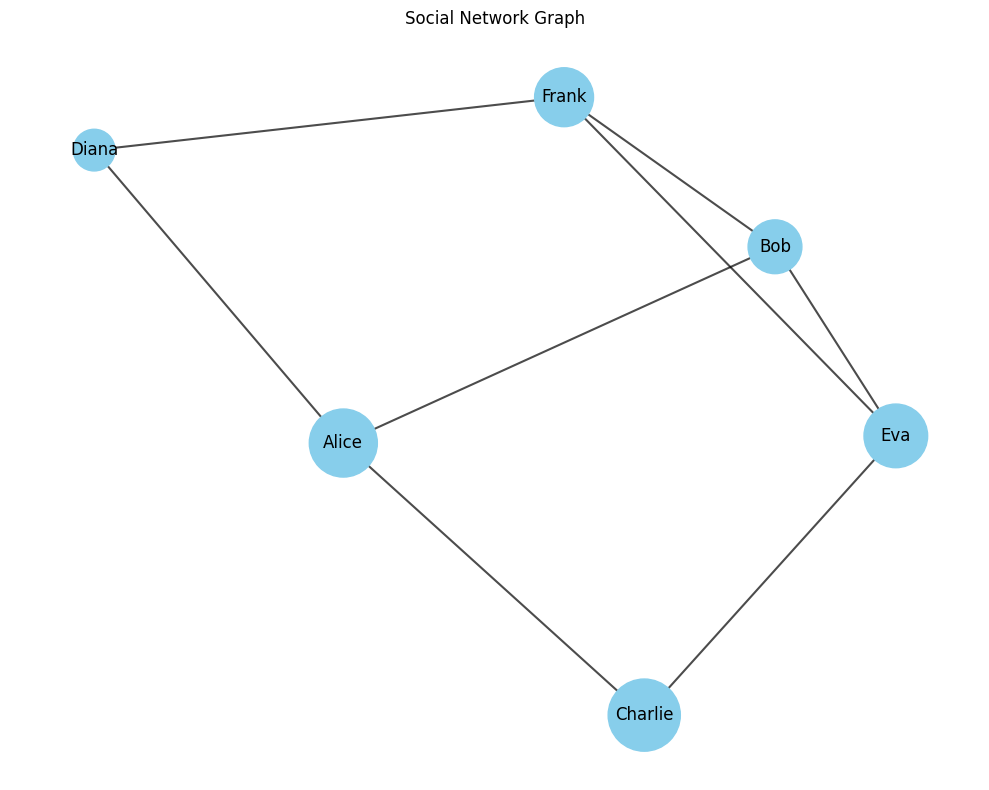

In [19]:
def visualize_social_network(G):
    plt.figure(figsize=(10, 8))

    pos = nx.spring_layout(G, seed=42)

    node_sizes = [300 * G.nodes[node]['activity'] for node in G.nodes()]

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.title("Social Network Graph")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_social_network(G)